# Proyecto de Consultoría

Una gran empresa de tecnología necesita tu ayuda, ¡han sido hackeados! Afortunadamente, sus ingenieros forenses han recopilado datos valiosos sobre los hackeos, incluida información como tiempo de sesión, ubicaciones, velocidad de escritura wpm, etc. El ingeniero forense te comunica lo que ha podido averiguar hasta ahora, ha podido obtener metadatos de cada sesión que los hackers utilizaron para conectarse a sus servidores. Estas son las características de los datos:

* 'Session_Connection_Time': Cuánto tiempo duró la sesión en minutos
* 'Bytes Transferred': Número de MB transferidos durante la sesión
* 'Kali_Trace_Used': Indica si el hacker estaba usando Kali Linux
* 'Servers_Corrupted': Número de servidores corrompidos durante el ataque
* 'Pages_Corrupted': Número de páginas accedidas ilegalmente
* 'Location': Ubicación de donde provino el ataque (Probablemente inútil porque los hackers usaron VPNs)
* 'WPM_Typing_Speed': Su velocidad de escritura estimada basada en los registros de sesión.


La empresa de tecnología tiene 3 posibles hackers que perpetraron el ataque. Están seguros de los dos primeros hackers pero no están muy seguros si el tercer hacker estuvo involucrado o no. ¡Han solicitado tu ayuda! ¿Puedes ayudar a descubrir si el tercer sospechoso tuvo algo que ver con los ataques, o fueron solo dos hackers? Probablemente no sea posible saberlo con seguridad, pero tal vez los datos puedan ayuder a descubrirlo.

**Un último dato clave, el ingeniero forense sabe que los hackers se turnan para los ataques. Lo que significa que cada uno debería tener aproximadamente la misma cantidad de ataques. Por ejemplo, si hubiera 100 ataques en total, entonces en una situación de 2 hackers cada uno debería tener alrededor de 50 ataques, en una situación de tres hackers cada uno tendría alrededor de 33 ataques. El ingeniero cree que este es el elemento clave para resolver esto, pero no sabe cómo distinguir estos datos sin etiquetar en grupos de hackers.**

In [79]:
# Importación de las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [80]:
# Carga de datos desde CSV
dataset = pd.read_csv("hack_data.csv")

In [81]:
dataset.head(10)

,Session_Connection_Time,Bytes Transferred,Kali_Trace_Used,Servers_Corrupted,Pages_Corrupted,Location,WPM_Typing_Speed
0,8.0,391.09,1,2.96,7.0,Slovenia,72.37
1,20.0,720.99,0,3.04,9.0,British Virgin Islands,69.08
2,31.0,356.32,1,3.71,8.0,Tokelau,70.58
3,2.0,228.08,1,2.48,8.0,Bolivia,70.80
4,20.0,408.50,0,3.57,8.0,Iraq,71.28
5,1.0,390.69,1,2.79,9.0,Marshall Islands,71.57
6,18.0,342.97,1,5.10,7.0,Georgia,72.32
7,22.0,101.61,1,3.03,7.0,Timor-Leste,72.03
8,15.0,275.53,1,3.53,8.0,Palestinian Territory,70.17
9,12.0,424.83,1,2.53,8.0,Bangladesh,69.99


In [82]:
dataset['Kali_Trace_Used'] = dataset['Kali_Trace_Used'].astype('category')
dataset.describe()

,Session_Connection_Time,Bytes Transferred,Servers_Corrupted,Pages_Corrupted,WPM_Typing_Speed
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,30.008982,607.245269,5.258503,10.838323,57.342395
std,14.088201,286.335932,2.301907,3.063526,13.411063
min,1.000000,10.000000,1.000000,6.000000,40.000000
25%,18.000000,372.200000,3.122500,8.000000,44.127500
50%,31.000000,601.650000,5.285000,10.500000,57.840000
75%,42.000000,843.702500,7.400000,14.000000,70.577500
max,60.000000,1330.500000,10.000000,15.000000,75.000000


In [83]:
dataset.isnull().sum()

Session_Connection_Time    0
Bytes Transferred          0
Kali_Trace_Used            0
Servers_Corrupted          0
Pages_Corrupted            0
Location                   0
WPM_Typing_Speed           0
dtype: int64

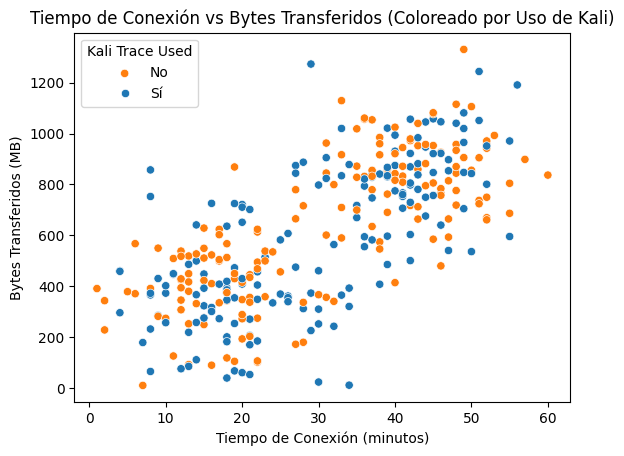

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'df' es tu DataFrame

# Scatter plot de 'Session_Connection_Time' vs 'Bytes Transferred',
# coloreado por si se usó Kali Linux
sns.scatterplot(x='Session_Connection_Time', y='Bytes Transferred', hue='Kali_Trace_Used', data=dataset)
plt.title('Tiempo de Conexión vs Bytes Transferidos (Coloreado por Uso de Kali)')
plt.xlabel('Tiempo de Conexión (minutos)')
plt.ylabel('Bytes Transferidos (MB)')
plt.legend(title='Kali Trace Used', labels=['No', 'Sí'])
plt.show()


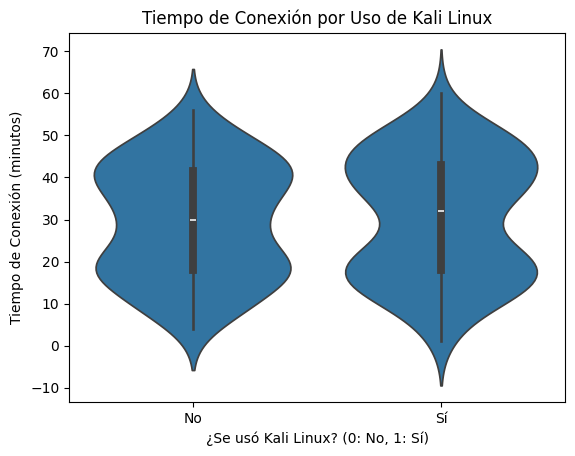

In [85]:
# Violin plots de 'Session_Connection_Time' para cada valor de 'Kali_Trace_Used'
sns.violinplot(x='Kali_Trace_Used', y='Session_Connection_Time', data=dataset)
plt.title('Tiempo de Conexión por Uso de Kali Linux')
plt.xlabel('¿Se usó Kali Linux? (0: No, 1: Sí)')
plt.ylabel('Tiempo de Conexión (minutos)')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

/home/andunker/Documents/MSC-Repos/ProgramacionEanCienciaDedatos/vEnv/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


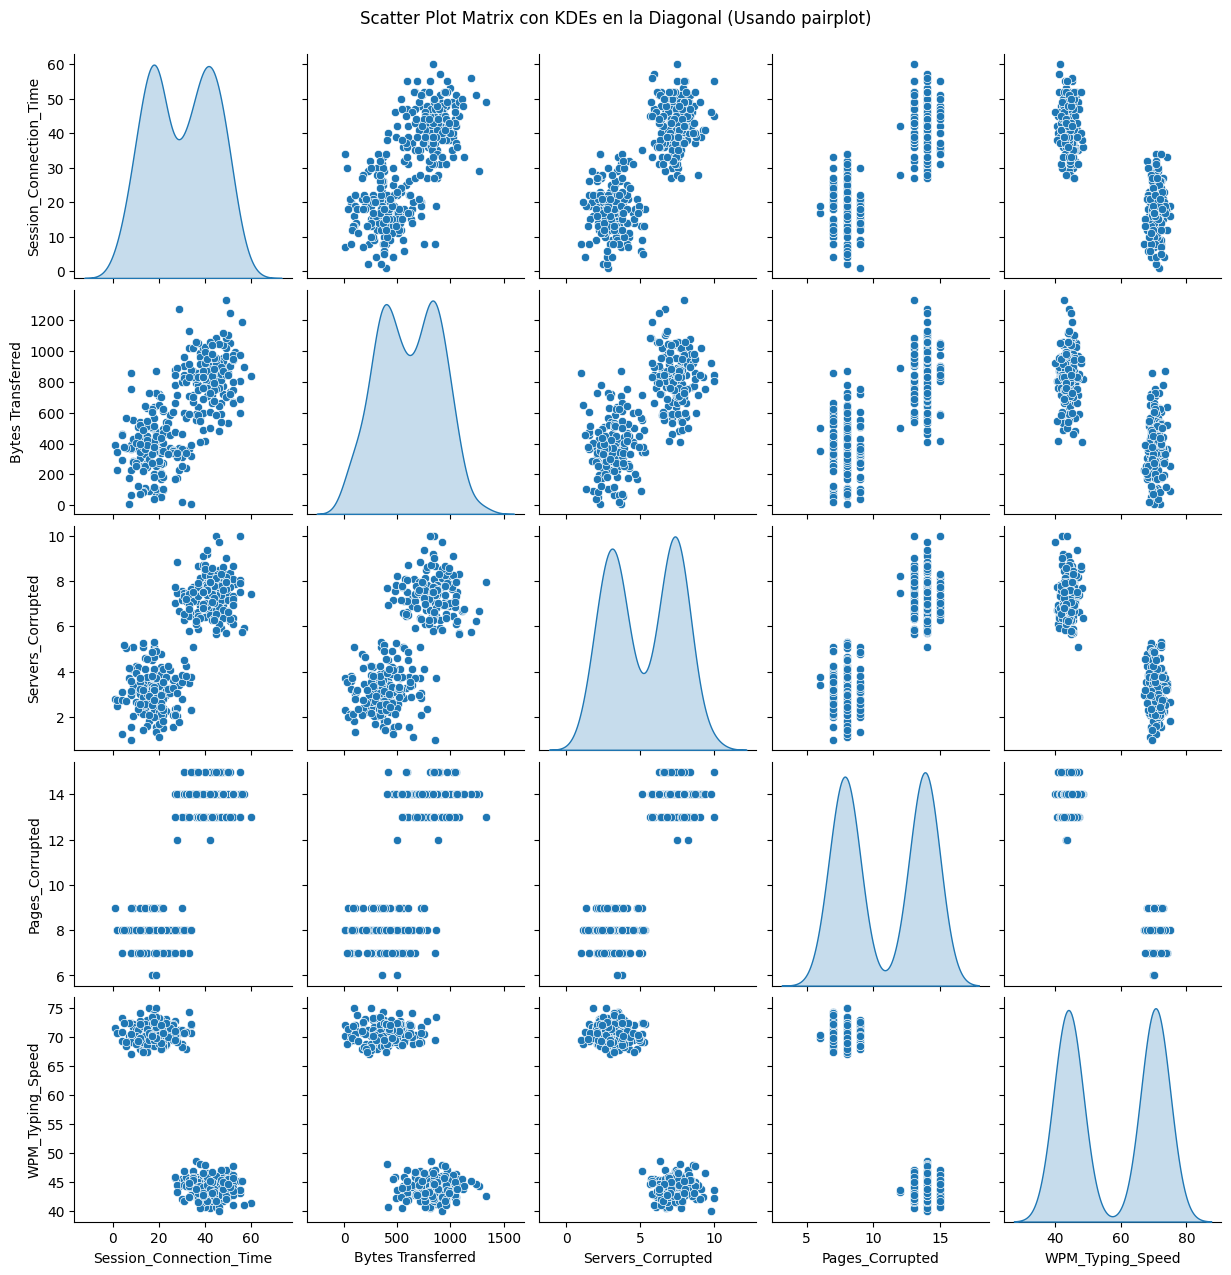

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona las columnas numéricas
numerical_cols = ['Session_Connection_Time', 'Bytes Transferred', 'Servers_Corrupted', 'Pages_Corrupted', 'WPM_Typing_Speed']
sns.pairplot(dataset[numerical_cols], kind='scatter', diag_kind='kde')
plt.suptitle('Scatter Plot Matrix con KDEs en la Diagonal (Usando pairplot)', y=1.02)
plt.show()

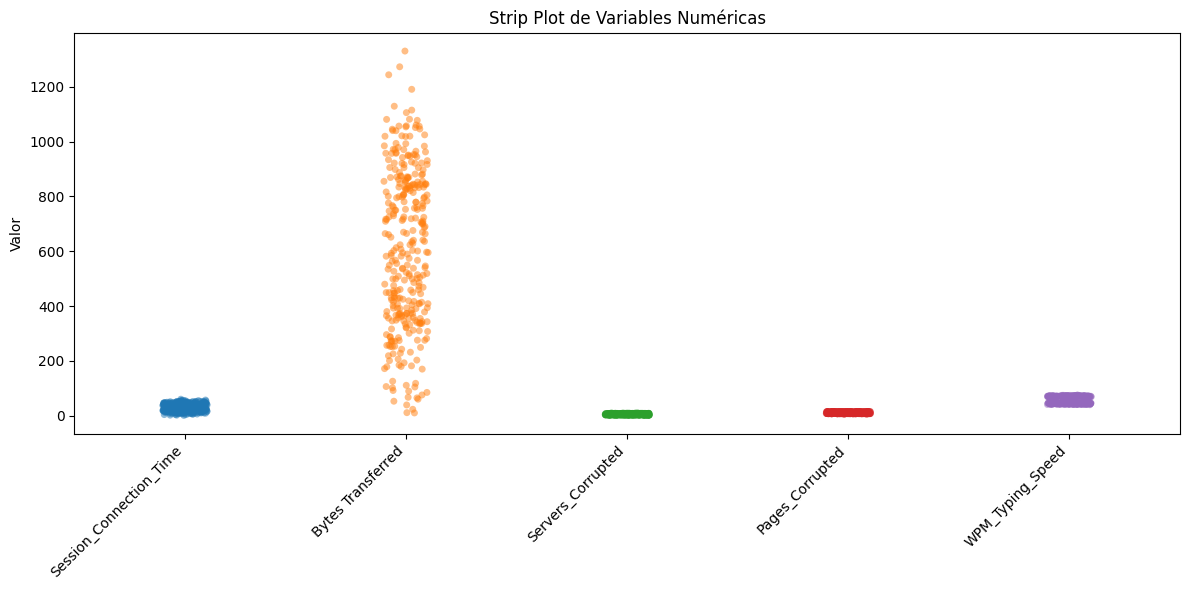

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['Session_Connection_Time', 'Bytes Transferred', 'Servers_Corrupted', 'Pages_Corrupted', 'WPM_Typing_Speed']

plt.figure(figsize=(12, 6))
sns.stripplot(data=dataset[numerical_cols], jitter=True, alpha=0.5) # jitter añade ruido para evitar superposición
plt.title('Strip Plot de Variables Numéricas')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Valor')
plt.tight_layout()
plt.show()

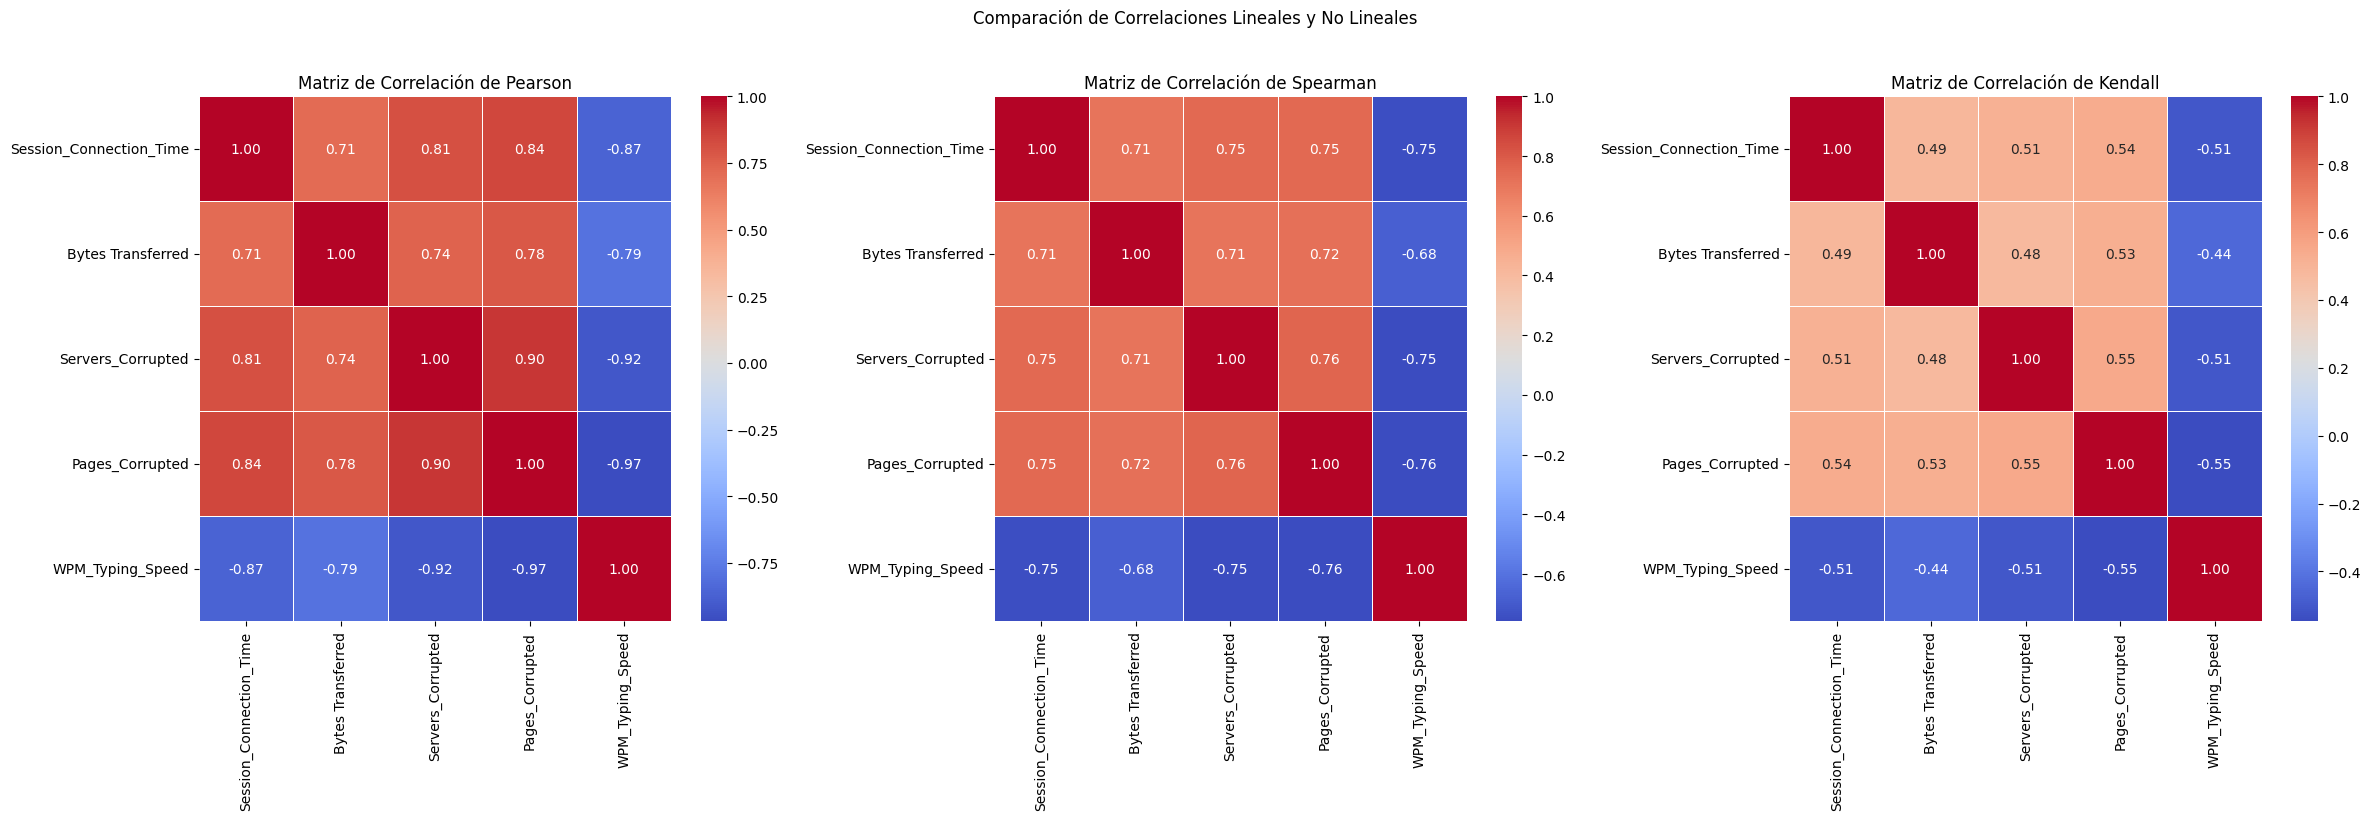

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, kendalltau

numerical_cols = ['Session_Connection_Time', 'Bytes Transferred', 'Servers_Corrupted', 'Pages_Corrupted', 'WPM_Typing_Speed']

# Crear figura con 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))

# Correlación de Pearson (original)
pearson_matrix = dataset[numerical_cols].corr(method='pearson')
sns.heatmap(pearson_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=ax1)
ax1.set_title('Matriz de Correlación de Pearson')

# Correlación de Spearman
spearman_matrix = dataset[numerical_cols].corr(method='spearman')
sns.heatmap(spearman_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=ax2)
ax2.set_title('Matriz de Correlación de Spearman')

# Correlación de Kendall
kendall_matrix = dataset[numerical_cols].corr(method='kendall') 
sns.heatmap(kendall_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=ax3)
ax3.set_title('Matriz de Correlación de Kendall')

plt.suptitle('Comparación de Correlaciones Lineales y No Lineales', y=1.02)
plt.tight_layout()
plt.show()

In [89]:
# Lista de columnas
print(dataset.columns)


Index(['Session_Connection_Time', 'Bytes Transferred', 'Kali_Trace_Used',
       'Servers_Corrupted', 'Pages_Corrupted', 'Location', 'WPM_Typing_Speed'],
      dtype='object')


In [90]:
# Definición de las características para el clustering
feat_cols = ['Session_Connection_Time', 'Bytes Transferred', 'Kali_Trace_Used',
             'Servers_Corrupted', 'Pages_Corrupted','WPM_Typing_Speed']

In [91]:
# Selección de características
features = dataset[feat_cols]

In [92]:
# Escalado de características
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [93]:
# Aplicación de K-means con k=3
kmeans3 = KMeans(n_clusters=3, random_state=42)
model_k3 = kmeans3.fit(scaled_features)

In [94]:
# Aplicación de K-means con k=2
kmeans2 = KMeans(n_clusters=2, random_state=42)
model_k2 = kmeans2.fit(scaled_features)

In [95]:
# Cálculo del WSSSE (Within Set Sum of Squared Errors)
wssse_k3 = model_k3.inertia_
wssse_k2 = model_k2.inertia_

# Comparación de resultados
print("Con K=3")
print("Within Set Sum of Squared Errors = " + str(wssse_k3))
print('--'*30)
print("Con K=2")
print("Within Set Sum of Squared Errors = " + str(wssse_k2))

Con K=3
Within Set Sum of Squared Errors = 435.45304149281816
------------------------------------------------------------
Con K=2
Within Set Sum of Squared Errors = 603.577870640845


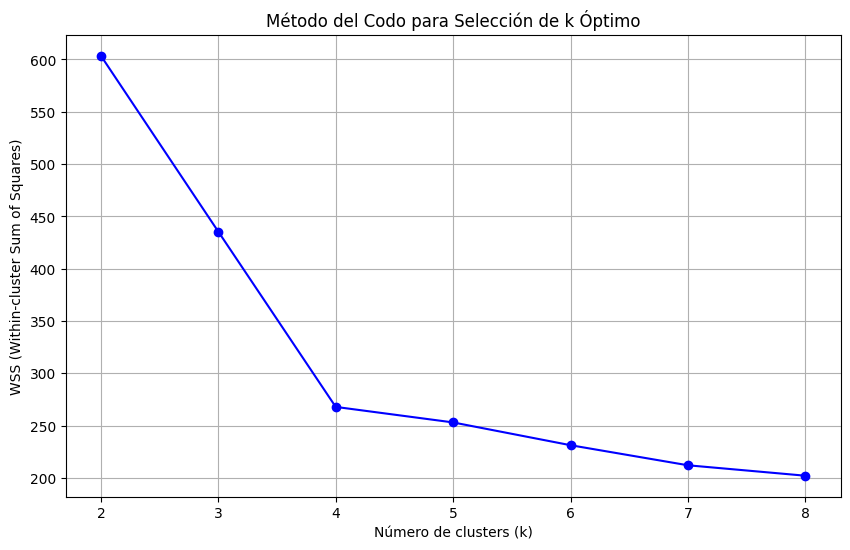

In [96]:
# Cálculo del WSS para diferentes valores de k
k_values = range(2,9)
wss_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    model = kmeans.fit(scaled_features)
    wss_values.append(model.inertia_)

# Gráfico del codo (elbow plot)
plt.figure(figsize=(10,6))
plt.plot(k_values, wss_values, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('WSS (Within-cluster Sum of Squares)')
plt.title('Método del Codo para Selección de k Óptimo')
plt.grid(True)
plt.show()


In [97]:
# Análisis de la distribución de los clusters
# Para k=3
dataset['prediction_k3'] = model_k3.labels_
print("Distribución con K=3:")
print(dataset['prediction_k3'].value_counts())

Distribución con K=3:
prediction_k3
1    167
2     84
0     83
Name: count, dtype: int64


In [98]:
# Para k=2
dataset['prediction_k2'] = model_k2.labels_
print("\nDistribución con K=2:")
print(dataset['prediction_k2'].value_counts())


Distribución con K=2:
prediction_k2
0    167
1    167
Name: count, dtype: int64


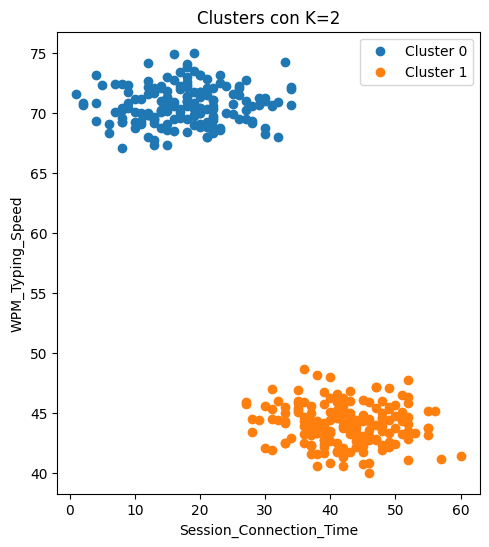

In [99]:
# Visualización de los clusters 
plt.figure(figsize=(12, 6))

# Para k=2
plt.subplot(1, 2, 1)
for i in range(2):
    plt.scatter(
        dataset[dataset['prediction_k2'] == i]['Session_Connection_Time'], 
        dataset[dataset['prediction_k2'] == i]['WPM_Typing_Speed'], 
        label=f'Cluster {i}'
    )
plt.title('Clusters con K=2')
plt.xlabel('Session_Connection_Time')
plt.ylabel('WPM_Typing_Speed')
plt.legend()


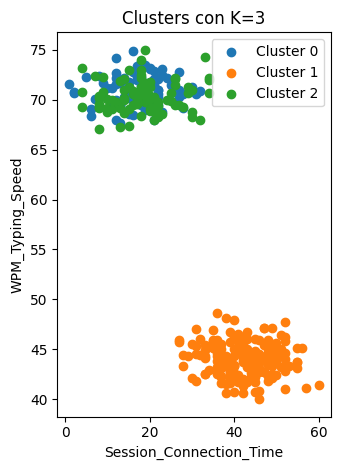


Conclusión:
Fueron 2 hackers. De hecho, nuestro algoritmo de clustering creó
dos clusters de igual tamaño con K=2, ¡no hay forma de que sea una coincidencia!


In [100]:
# Para k=3
plt.subplot(1, 2, 2)
for i in range(3):
    plt.scatter(
        dataset[dataset['prediction_k3'] == i]['Session_Connection_Time'], 
        dataset[dataset['prediction_k3'] == i]['WPM_Typing_Speed'], 
        label=f'Cluster {i}'
    )
plt.title('Clusters con K=3')
plt.xlabel('Session_Connection_Time')
plt.ylabel('WPM_Typing_Speed')
plt.legend()

plt.tight_layout()
plt.show()

# Conclusión
print("\nConclusión:")
print("Fueron 2 hackers. De hecho, nuestro algoritmo de clustering creó")
print("dos clusters de igual tamaño con K=2, ¡no hay forma de que sea una coincidencia!")

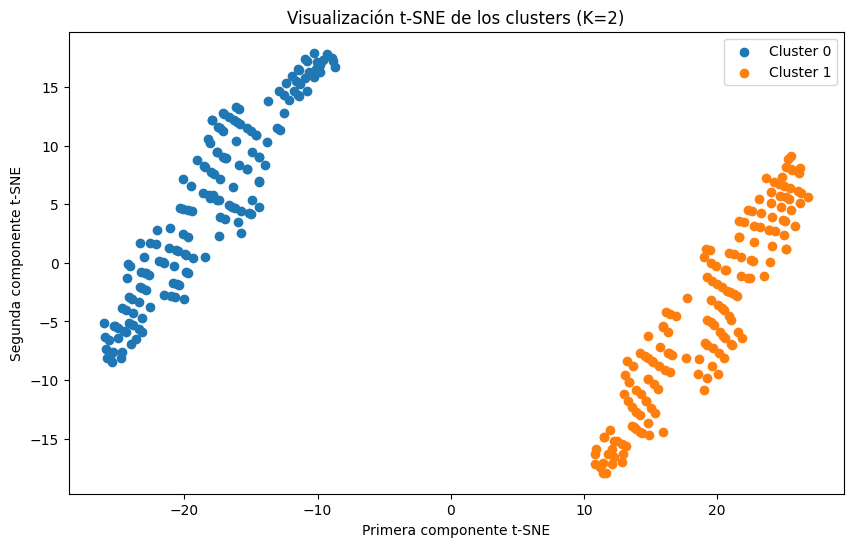

In [101]:
# Aplicar t-SNE para visualización en 2D
from sklearn.manifold import TSNE

# Crear y ajustar el modelo t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(dataset[['Session_Connection_Time', 'WPM_Typing_Speed']])

# Crear el gráfico
plt.figure(figsize=(10, 6))
for i in range(2):
    mask = dataset['prediction_k2'] == i
    plt.scatter(
        tsne_results[mask, 0],
        tsne_results[mask, 1],
        label=f'Cluster {i}'
    )

plt.title('Visualización t-SNE de los clusters (K=2)')
plt.xlabel('Primera componente t-SNE')
plt.ylabel('Segunda componente t-SNE')
plt.legend()
plt.show()


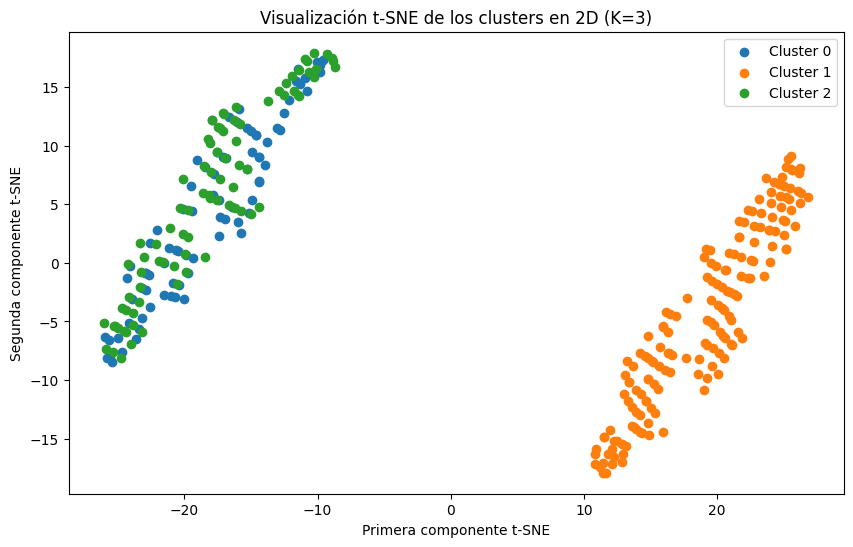

Se ha realizado la visualización t-SNE con 2 componentes y 3 clusters.
Rango de la primera componente: -26.048342 a 26.84641
Rango de la segunda componente: -17.920507 a 17.938416


In [102]:
# Aplicar t-SNE para visualización en 2D con 3 clusters
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Crear y ajustar el modelo t-SNE con 2 componentes
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(dataset[['Session_Connection_Time', 'WPM_Typing_Speed']])

# Crear el gráfico 2D con 3 clusters
plt.figure(figsize=(10, 6))

for i in range(3):  # 3 clusters
    mask = dataset['prediction_k3'] == i  # Usando 'prediction_k3' en lugar de 'prediction_k2'
    plt.scatter(
        tsne_results[mask, 0],
        tsne_results[mask, 1],
        label=f'Cluster {i}'
    )

plt.title('Visualización t-SNE de los clusters en 2D (K=3)')  # K=3
plt.xlabel('Primera componente t-SNE')
plt.ylabel('Segunda componente t-SNE')
plt.legend()
plt.show()

print("Se ha realizado la visualización t-SNE con 2 componentes y 3 clusters.")
print("Rango de la primera componente:", tsne_results[:, 0].min(), "a", tsne_results[:, 0].max())
print("Rango de la segunda componente:", tsne_results[:, 1].min(), "a", tsne_results[:, 1].max())


# Validación cruzada

En esta parte del proyecto, realizamos un proceso de validación cruzada para evaluar la estabilidad y calidad de los clusters obtenidos, y determinar si los grupos identificados representan de forma coherente a los posibles atacantes.

Silhouette Score promedio: 0.6013
Calinski-Harabasz Index promedio: 153.0459
Davies-Bouldin Index promedio (menor es mejor): 0.6399


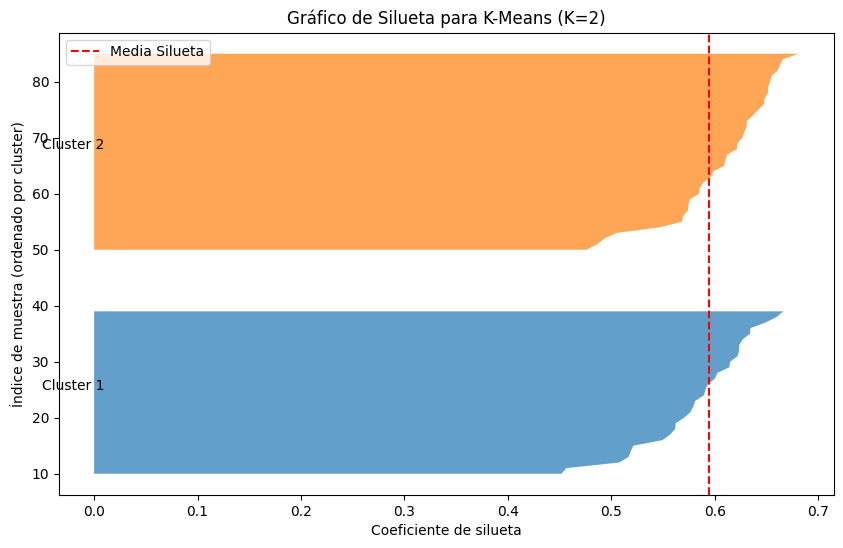

In [103]:
from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Crear el objeto KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Almacenar métricas por fold
sil_scores = []
ch_scores = []
db_scores = []

# Validación cruzada
for train_idx, test_idx in kf.split(scaled_features):
    X_train, X_test = scaled_features[train_idx], scaled_features[test_idx]

    # Entrenar el modelo KMeans con k=2
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans.fit(X_train)

    # Predecir los clusters para el conjunto de prueba
    labels = kmeans.predict(X_test)

    # Calcular métricas internas
    sil = silhouette_score(X_test, labels)
    ch = calinski_harabasz_score(X_test, labels)
    db = davies_bouldin_score(X_test, labels)

    sil_scores.append(sil)
    ch_scores.append(ch)
    db_scores.append(db)

# Resultados
print(f"Silhouette Score promedio: {np.mean(sil_scores):.4f}")
print(f"Calinski-Harabasz Index promedio: {np.mean(ch_scores):.4f}")
print(f"Davies-Bouldin Index promedio (menor es mejor): {np.mean(db_scores):.4f}")

# Importar la función necesaria
from sklearn.metrics import silhouette_samples

# Calcular valores de silueta para el último fold
silhouette_vals = silhouette_samples(X_test, labels)

# Preparar la figura
fig, ax = plt.subplots(figsize=(10, 6))

y_lower = 10  # espacio inicial
for i in range(2):  # Tenemos 2 clusters
    # Valores de silueta del cluster i
    ith_cluster_silhouette = silhouette_vals[labels == i]
    ith_cluster_silhouette.sort()
    size_cluster = ith_cluster_silhouette.shape[0]
    y_upper = y_lower + size_cluster

    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette,
        alpha=0.7
    )
    # Etiqueta del cluster
    ax.text(-0.05, y_lower + 0.5 * size_cluster, f'Cluster {i+1}')
    y_lower = y_upper + 10  # 10 de separación entre clusters

ax.set_title("Gráfico de Silueta para K-Means (K=2)")
ax.set_xlabel("Coeficiente de silueta")
ax.set_ylabel("Índice de muestra (ordenado por cluster)")
ax.axvline(x=np.mean(silhouette_vals), color="red", linestyle="--", label="Media Silueta")
ax.legend()
plt.show()



### 📝 Métricas de Evaluación para Clustering No Supervisado

| Métrica                     | Qué mide                                               | Rango            | Interpretación ideal         |
|-----------------------------|--------------------------------------------------------|------------------|-------------------------------|
| **Silhouette Score**        | Qué tan similar es un punto a su propio cluster vs. otros. | -1 a 1          | Más cercano a **1** es mejor. Valores > 0.5 indican clusters bien definidos. |
| **Calinski-Harabasz Index** | La relación entre la dispersión entre clusters y dentro de ellos. | [0, ∞)         | **Mayor es mejor**. Indica mejor separación entre clusters. |
| **Davies-Bouldin Index**    | Promedio de la similitud entre cada cluster y el más similar. | [0, ∞)         | **Menor es mejor**. Cero es ideal (clusters muy distintos entre sí). |

### 📈 Evaluación de Clustering

1. **Silhouette Score (promedio: 0.6013)**  
   Mide la cohesión interna y la separación entre clusters.  
   - **Rango**: -1 a 1.  
   - **Interpretación**:  
     - Cerca de 1: Bien definidos y separados.  
     - Cerca de 0: Puntos en la frontera de clusters.  
     - Cerca de -1: Puntos mal agrupados.  
   - **Resultado**: 0.6013 — **Bueno**: Los clusters están bien separados y los puntos dentro de un cluster son más similares entre sí.

2. **Calinski-Harabasz Index (promedio: 153.0459)**  
   Mide la relación entre dispersión interna y dispersión entre clusters.  
   - **Rango**: No tiene límite superior, **mayor es mejor**.  
   - **Interpretación**:  
     - Más alto: Mejor separación entre clusters.  
     - Más bajo: Los clusters se solapan más.  
   - **Resultado**: 153.0459 — **Bueno**: Buena separación entre clusters.

3. **Davies-Bouldin Index (promedio: 0.6399)**  
   Mide la similaridad entre cada cluster y su vecino más cercano.  
   - **Rango**: 0 a ∞, **menor es mejor**.  
   - **Interpretación**:  
     - Cerca de 0: Clusters bien separados.  
     - Más alto: Clusters solapados.  
   - **Resultado**: 0.6399 — **Bueno**: Los clusters están razonablemente bien separados, valor bajo indica buena distinción.


### ⚡Feature Importance

In [ ]:
centroids = model_k2.cluster_centers_

# Diferencia absoluta entre los centroides (cluster 0 vs cluster 1)
importance = np.abs(centroids[0] - centroids[1])
feature_importance = pd.Series(importance, index=features.columns)
feature_importance = feature_importance.sort_values(ascending=False)

print(feature_importance)

WPM_Typing_Speed           1.985000
Pages_Corrupted            1.953636
Servers_Corrupted          1.841745
Session_Connection_Time    1.742292
Bytes Transferred          1.607300
Kali_Trace_Used            0.059897
dtype: float64


## Interpretación de resultados

### 🔐 Conclusión para el contexto de ciberseguridad:
El análisis de clustering no supervisado sobre los logs revela dos patrones de actividad claramente diferenciados, lo cual respalda la hipótesis del equipo forense de que dos entidades distintas participaron en el ataque. Esta evidencia puede ser utilizada para profundizar en perfiles de comportamiento, atribución de amenazas o segmentación de tácticas empleadas.

### 📌 Siguientes pasos sugeridos:

- Etiquetar manualmente algunos registros para validar los grupos con más precisión.

- Aplicar clustering jerárquico o DBSCAN para ver si aparecen subgrupos.